<h3>Importing Packages</h3>

In [1]:
# This cell is used for importing necessary packages such as NumPy, Pandas and an SQL extension.
import numpy as np
import pandas as pd
import sqlite3
from sqlalchemy import create_engine
%reload_ext sql
from langdetect import detect
from langdetect import lang_detect_exception
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
con = sqlite3.connect("SQLiteMagicDB.db")
cur = con.cursor()
%sql sqlite:///SQLiteMagicDB.db

<h3>Importing Datasets</h3>

In [3]:
#This cell reads the two CSV source files and stores them in DataFrames named Tweet_Train and Tweet_Test.
Tweet_Train = pd.DataFrame(pd.read_csv('twitter_training.csv'))
Tweet_Test = pd.DataFrame(pd.read_csv('twitter_validation.csv'))

<h3>Understanding the Data</h3>

In [4]:
#To rename the columns of the Tweet_Train and Tweet_Test DataFrames. 
headers=['Tweet ID', 'Entity', 'Sentiment', 'Content']
Tweet_Train.columns = headers
Tweet_Test.columns = headers
#To display the first 25 rows of Tweet_Train.
Tweet_Train.head(25)

,Tweet ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


In [5]:
Tweet_Train.tail(25)

,Tweet ID,Entity,Sentiment,Content
74656,9196,Nvidia,Negative,really doesn't look bad btw!.. net.com/google-...
74657,9197,Nvidia,Neutral,Nvidia doesn’t want to give up its 2017 ‘crypt...
74658,9197,Nvidia,Neutral,"Nvidia plans to release its 2017 ""Crypto Craze..."
74659,9197,Nvidia,Neutral,"Nvidia does not want to give up its ""cryptoins..."
74660,9197,Nvidia,Neutral,Nvidia doesn’t intend to give away its 2017 ad...
74661,9197,Nvidia,Neutral,Nvidia therefore doesn ’ t want to give up its...
74662,9197,Nvidia,Neutral,is doesn’t should I give up its password ‘cryp...
74663,9198,Nvidia,Negative,Nvidia really delayed the 3070 2 weeks .
74664,9198,Nvidia,Negative,Nvidia really delayed the 3070 by 2 weeks.
74665,9198,Nvidia,Negative,Nvidia did delay by 3070 2 weeks.


In [6]:
#To get column names of the dataset
Tweet_Train.columns

Index(['Tweet ID', 'Entity', 'Sentiment', 'Content'], dtype='object')

In [7]:
#To get the number of rows and columns in the dataset
Tweet_Train.shape

(74681, 4)

<h3> Data Cleaning </h3>

In [8]:
#Checking for missing values
missing_data = Tweet_Train.isnull()
#Counting the missing values for each column
for column in missing_data.columns.values.tolist():
    print (missing_data[column].value_counts())
    print("")   

Tweet ID
False    74681
Name: count, dtype: int64

Entity
False    74681
Name: count, dtype: int64

Sentiment
False    74681
Name: count, dtype: int64

Content
False    73995
True       686
Name: count, dtype: int64



In [9]:
#Counting the missing values for each column
Tweet_Train.isna().sum()

Tweet ID       0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [10]:
#Viewing the NaN values for understanding their nature
Mask=Tweet_Train['Content'].isnull()
Tweet_Train[Mask]

,Tweet ID,Entity,Sentiment,Content
60,2411,Borderlands,Neutral,NaN
552,2496,Borderlands,Neutral,NaN
588,2503,Borderlands,Neutral,NaN
744,2532,Borderlands,Positive,NaN
1104,2595,Borderlands,Positive,NaN
...,...,...,...,...
73971,9073,Nvidia,Positive,NaN
73972,9073,Nvidia,Positive,NaN
74420,9154,Nvidia,Positive,NaN
74421,9154,Nvidia,Positive,NaN


In [11]:
#To get the total number of rows and columns in the dataset
count_total = Tweet_Train.shape
count_total

(74681, 4)

In [12]:
#To get the number of rows and columns in the dataset with missing values
count_dropna_rows = Tweet_Train.dropna().shape
count_dropna_rows

(73995, 4)

In [13]:
#To remove duplicate values
Tweet_Train[Tweet_Train.duplicated(subset=['Content'], keep=False)]
Tweet_Train_Clean= Tweet_Train.drop_duplicates(subset=['Content'], keep='first')
#To remove missing values
Tweet_Train_Clean=Tweet_Train_Clean.dropna()
#To get the number of rows and columns in the clean dataset
Tweet_Train_Clean.shape

(69490, 4)

<h3> Data Transformation </h3>

In [14]:
# To create a function to detect the language of a tweet and map to full language names
def detect_language(tweet):
    try:
        lang_code = detect(tweet)
        # Create a dictionary to map language abbreviations to full names
        language_mapping = {
            "af": "Afrikaans",
            "bg": "Bulgarian",
            "ca": "Catalan",
            "cs": "Czech",
            "cy": "Welsh",
            "da": "Danish",
            "de": "German",
            "en": "English",
            "es": "Spanish",
            "et": "Estonian",
            "fi": "Finnish",
            "fr": "French",
            "hr": "Croatian",
            "hu": "Hungarian",
            "id": "Indonesian",
            "it": "Italian",
            "lt": "Lithuanian",
            "lv": "Latvian",
            "mk": "Macedonian",
            "nl": "Dutch",
            "no": "Norwegian",
            "pl": "Polish",
            "pt": "Portuguese",
            "ro": "Romanian",
            "ru": "Russian",
            "sk": "Slovak",
            "sl": "Slovenian",
            "so": "Somali",
            "sq": "Albanian",
            "sv": "Swedish",
            "sw": "Swahili",
            "th": "Thai",
            "tl": "Tagalog",
            "tr": "Turkish",
            "uk": "Ukrainian",
            "vi": "Vietnamese"
        }
        return language_mapping.get(lang_code, "Unknown")
    except lang_detect_exception.LangDetectException:
        return "Unknown"

# Apply the function to each tweet in the "Content" column and create a new "Language" column
Tweet_Train_Clean["Language"] = Tweet_Train_Clean["Content"].apply(detect_language)

# To display the resulting DataFrame with the detected languages
Tweet_Train_Clean.head(25)

,Tweet ID,Entity,Sentiment,Content,Language
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,English
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,Swedish
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,English
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,English
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,English
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...,English
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...,English
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...,English
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...,English
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...,English


In [15]:
# To define the path to the SQLite Data Base
database_url = 'sqlite:///SQLiteMagicDB.db'

# To create a SQLAlchemy engine
engine = create_engine(database_url)


In [16]:
#To add the Tweet_Train_Clean to the SQLite Data Base
Tweet_Train_Clean.to_sql('Tweet_Train_Clean', con=engine, if_exists='replace', index=False)

69490

In [17]:
# To group the data by entity using SQL
# SQL query
sql_query = """
SELECT 
    Entity,
    COUNT(*) AS Number_of_Emotions
FROM 
    Tweet_Train_Clean
GROUP BY
    Entity
"""

# Execute the SQL query
Data_View_1 = pd.read_sql_query(sql_query, engine)
Data_View_1

,Entity,Number_of_Emotions
0,Amazon,2193
1,ApexLegends,2187
2,AssassinsCreed,2104
3,Battlefield,2191
4,Borderlands,2179
5,CS-GO,2107
6,CallOfDuty,2259
7,CallOfDutyBlackopsColdWar,2202
8,Cyberpunk2077,2093
9,Dota2,2192


In [18]:
# To group the data by Sentiments using SQL
# SQL query
sql_query = """
SELECT 
    Sentiment,
    COUNT(*) AS Number_of_Emotions
FROM 
    Tweet_Train_Clean
GROUP BY
    Sentiment
"""

# Execute the SQL query
Data_View_2 = pd.read_sql_query(sql_query, engine)
Data_View_2

,Sentiment,Number_of_Emotions
0,Irrelevant,12216
1,Negative,21166
2,Neutral,17042
3,Positive,19066


In [19]:
# To group the data by languages using SQL
# SQL query
sql_query = """
SELECT 
    Language,
    COUNT(*) AS Number_of_Emotions
FROM 
    Tweet_Train_Clean
GROUP BY
    Language
"""

# Execute the SQL query
Data_View_3=pd.read_sql_query(sql_query, engine)
Data_View_3

,Language,Number_of_Emotions
0,Afrikaans,303
1,Albanian,62
2,Bulgarian,5
3,Catalan,104
4,Croatian,32
5,Czech,12
6,Danish,199
7,Dutch,244
8,English,65373
9,Estonian,112


<h3>Exploratory Data Analysis</h3>

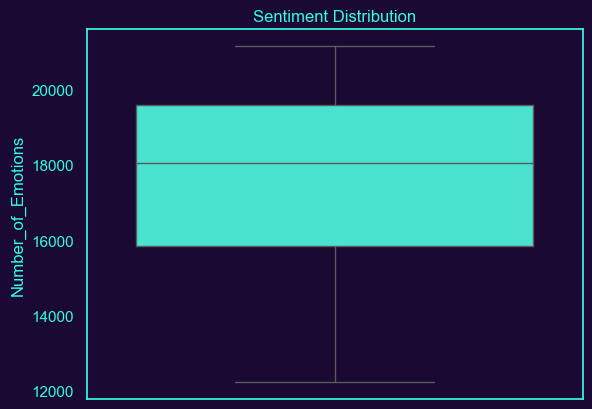

In [33]:
# Set the background color and style
sns.set(style="white", rc={"axes.facecolor": (26/255, 9/255, 51/255)})

# Create a boxplot with custom colors
g = sns.boxplot(data=Data_View_2['Number_of_Emotions'], showfliers=False, color=(50/255, 251/255, 226/255))

# Set the title and text color
g.set_title('Sentiment Distribution', color=(50/255, 251/255, 226/255))

#Formatting Axis Label and Values
ax = plt.gca()
ax.xaxis.label.set_color((50/255, 251/255, 226/255))
ax.yaxis.label.set_color((50/255, 251/255, 226/255))
ax.tick_params(axis='x', colors=(50/255, 251/255, 226/255))
ax.tick_params(axis='y', colors=(50/255, 251/255, 226/255))

# Set the border color to match the title color
ax.spines['bottom'].set_color((50/255, 251/255, 226/255))
ax.spines['top'].set_color((50/255, 251/255, 226/255))
ax.spines['right'].set_color((50/255, 251/255, 226/255))
ax.spines['left'].set_color((50/255, 251/255, 226/255))

# Set the background color outside the plot area
fig, ax = plt.gcf(), plt.gca()
fig.patch.set_facecolor((26/255, 9/255, 51/255))

# Display the plot
plt.show()

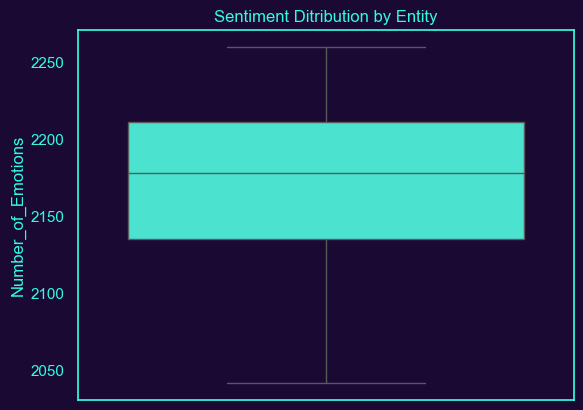

In [34]:
# To create boxplots for studying Sentiment distribution by Entity
sns.set(style="white", rc={"axes.facecolor": (26/255, 9/255, 51/255)})

g = sns.boxplot(data=Data_View_1['Number_of_Emotions'], showfliers=False, color=(50/255, 251/255, 226/255))
g.set_title('Sentiment Ditribution by Entity', color=(50/255, 251/255, 226/255))

#Formatting Axis Label and Values
ax = plt.gca()
ax.xaxis.label.set_color((50/255, 251/255, 226/255))
ax.yaxis.label.set_color((50/255, 251/255, 226/255))
ax.tick_params(axis='x', colors=(50/255, 251/255, 226/255))
ax.tick_params(axis='y', colors=(50/255, 251/255, 226/255))

# Set the border color to match the title color
ax.spines['bottom'].set_color((50/255, 251/255, 226/255))
ax.spines['top'].set_color((50/255, 251/255, 226/255))
ax.spines['right'].set_color((50/255, 251/255, 226/255))
ax.spines['left'].set_color((50/255, 251/255, 226/255))

# Set the background color outside the plot area
fig, ax = plt.gcf(), plt.gca()
fig.patch.set_facecolor((26/255, 9/255, 51/255))

plt.show()  # Display the plot


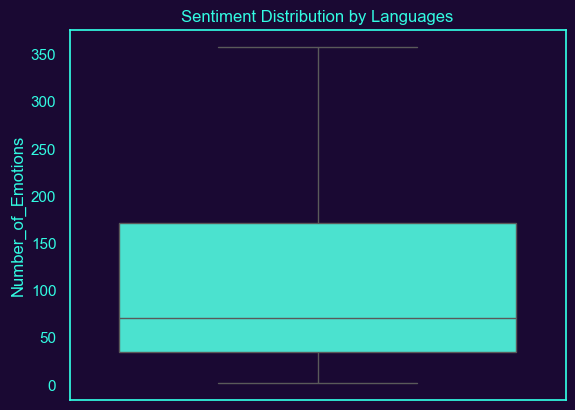

In [36]:
# To create boxplot for studying Sentiment distribution by Languages
sns.set(style="white", rc={"axes.facecolor": (26/255, 9/255, 51/255)})

g = sns.boxplot(data=Data_View_3['Number_of_Emotions'], showfliers=False, color=(50/255, 251/255, 226/255))
g.set_title('Sentiment Distribution by Languages', color=(50/255, 251/255, 226/255))

#Formatting Axis Label and Values
ax = plt.gca()
ax.xaxis.label.set_color((50/255, 251/255, 226/255))
ax.yaxis.label.set_color((50/255, 251/255, 226/255))
ax.tick_params(axis='x', colors=(50/255, 251/255, 226/255))
ax.tick_params(axis='y', colors=(50/255, 251/255, 226/255))

# Set the border color to match the title color
ax.spines['bottom'].set_color((50/255, 251/255, 226/255))
ax.spines['top'].set_color((50/255, 251/255, 226/255))
ax.spines['right'].set_color((50/255, 251/255, 226/255))
ax.spines['left'].set_color((50/255, 251/255, 226/255))

# Set the background color outside the plot area
fig, ax = plt.gcf(), plt.gca()
fig.patch.set_facecolor((26/255, 9/255, 51/255))

plt.show()  # Display the plot

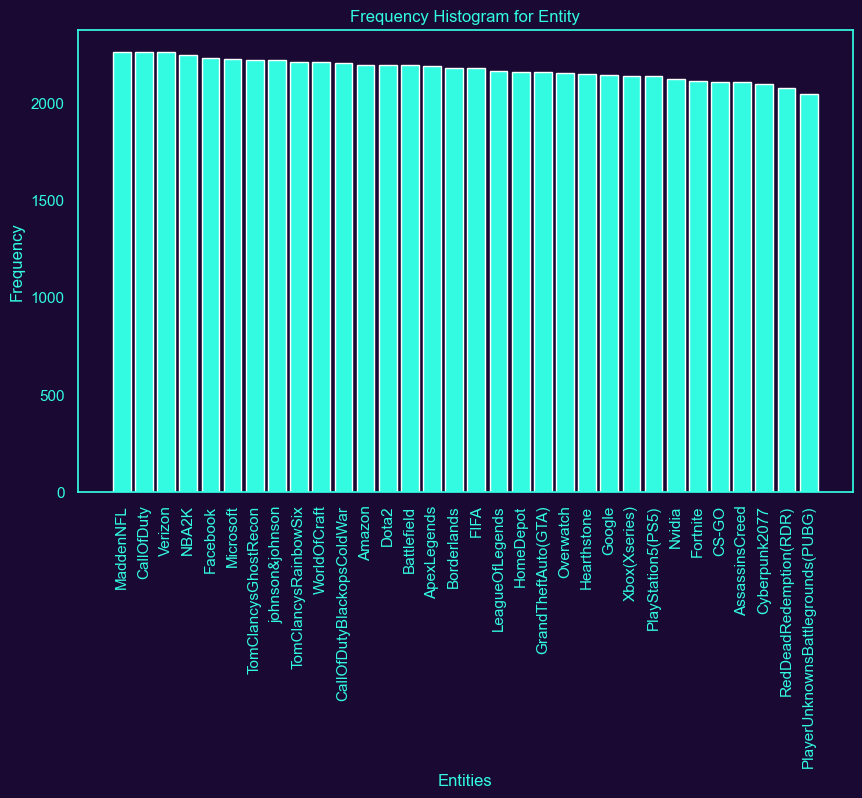

In [38]:
# Set the figure background color
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor((26/255, 9/255, 51/255))

# Create a bar chart histogram with custom colors
value_counts = Tweet_Train_Clean['Entity'].value_counts()
bars = ax.bar(value_counts.index, value_counts.values, color=(50/255, 251/255, 226/255))

# Set the title and axis labels color
title_color = (50/255, 251/255, 226/255)
ax.set_title(f'Frequency Histogram for Entity', color=title_color)
ax.set_xlabel('Entities', color=title_color)
ax.set_ylabel('Frequency', color=title_color)

# Set the tick colors and remove grid lines
ax.tick_params(axis='both', colors=title_color)
ax.xaxis.grid(False)
ax.yaxis.grid(False)

# Set the border color to match the title color
ax.spines['bottom'].set_color((50/255, 251/255, 226/255))
ax.spines['top'].set_color((50/255, 251/255, 226/255))
ax.spines['right'].set_color((50/255, 251/255, 226/255))
ax.spines['left'].set_color((50/255, 251/255, 226/255))

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()


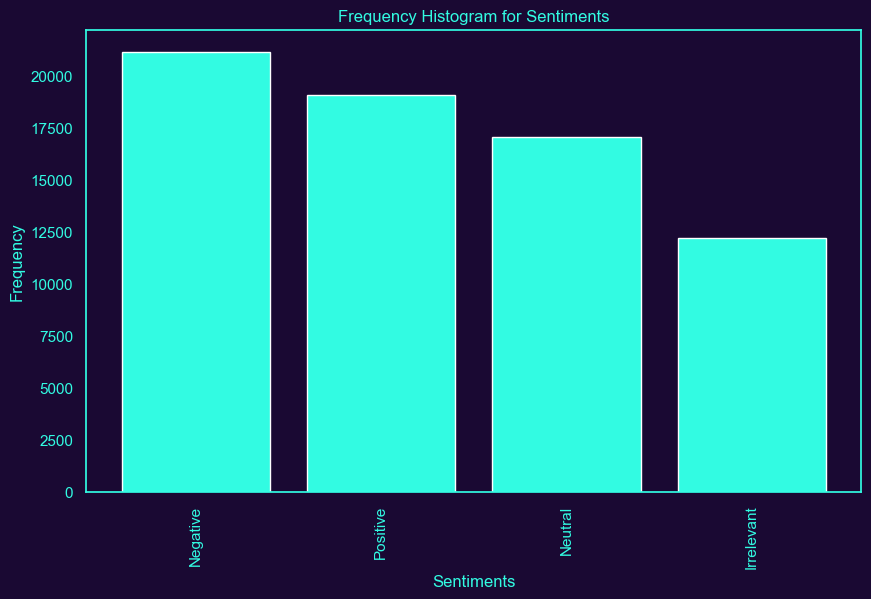

In [39]:
# Set the figure background color
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor((26/255, 9/255, 51/255))

# Create a bar chart histogram with custom colors
value_counts = Tweet_Train_Clean['Sentiment'].value_counts()
bars = ax.bar(value_counts.index, value_counts.values, color=(50/255, 251/255, 226/255))

# Set the title and axis labels color
title_color = (50/255, 251/255, 226/255)
ax.set_title(f'Frequency Histogram for Sentiments', color=title_color)
ax.set_xlabel('Sentiments', color=title_color)
ax.set_ylabel('Frequency', color=title_color)

# Set the tick colors and remove grid lines
ax.tick_params(axis='both', colors=title_color)
ax.xaxis.grid(False)
ax.yaxis.grid(False)

# Set the border color to match the title color
ax.spines['bottom'].set_color((50/255, 251/255, 226/255))
ax.spines['top'].set_color((50/255, 251/255, 226/255))
ax.spines['right'].set_color((50/255, 251/255, 226/255))
ax.spines['left'].set_color((50/255, 251/255, 226/255))

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()


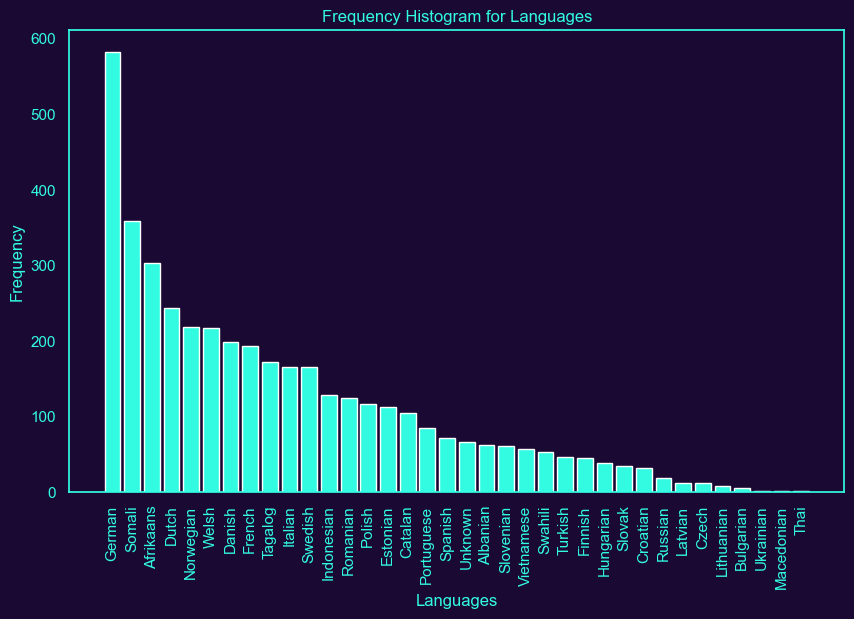

In [40]:
import matplotlib.pyplot as plt

# Set the figure background color
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor((26/255, 9/255, 51/255))

# To filter the data to exclude 'English' as it has a very high value
Language_Filter = Tweet_Train_Clean[Tweet_Train_Clean['Language'] != 'English']

# Create a bar chart histogram with custom colors
value_counts = Language_Filter['Language'].value_counts()
bars = ax.bar(value_counts.index, value_counts.values, color=(50/255, 251/255, 226/255))

# Set the title and axis labels color
title_color = (50/255, 251/255, 226/255)
ax.set_title(f'Frequency Histogram for Languages', color=title_color)
ax.set_xlabel('Languages', color=title_color)
ax.set_ylabel('Frequency', color=title_color)

# Set the tick colors and remove grid lines
ax.tick_params(axis='both', colors=title_color)
ax.xaxis.grid(False)
ax.yaxis.grid(False)

# Set the border color to match the title color
ax.spines['bottom'].set_color((50/255, 251/255, 226/255))
ax.spines['top'].set_color((50/255, 251/255, 226/255))
ax.spines['right'].set_color((50/255, 251/255, 226/255))
ax.spines['left'].set_color((50/255, 251/255, 226/255))

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()


In [26]:
Tweet_Train_Clean['Entity'].describe()

count         69490
unique           32
top       MaddenNFL
freq           2260
Name: Entity, dtype: object

In [27]:
Tweet_Train_Clean['Sentiment'].describe()

count        69490
unique           4
top       Negative
freq         21166
Name: Sentiment, dtype: object

In [28]:
Tweet_Train_Clean['Language'].describe()

count       69490
unique         37
top       English
freq        65373
Name: Language, dtype: object